###  Fetching Datasets

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml("mnist_784")

In [4]:
x , y = mnist['data'],mnist['target']

In [5]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
x.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
%matplotlib inline

In [9]:
import matplotlib
import matplotlib.pyplot as plt

In [10]:
some_digit = x[36231]
some_digit_image = some_digit.reshape(28,28)

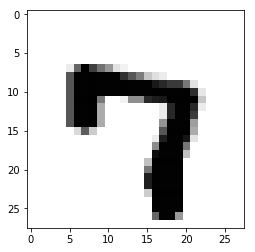

In [11]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,interpolation = "nearest")

In [85]:
y[36231]

'7'

In [86]:
x_train,x_test = x[:6000], x[6000:]

In [87]:
y_train, y_test = y[:6000],y[6000:]

In [88]:
import numpy as np
shuff = np.random.permutation(6000)
x_train,y_train = x_train[shuff],y_train[shuff]

###  Creating a 2 detector

In [89]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_7 = (y_train == 7)
y_test_7 = (y_test == 7)

In [90]:
y_train

array([8, 0, 8, ..., 5, 4, 8], dtype=int8)

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
clf = LogisticRegression(tol = 0.1)


In [93]:
clf.fit(x_train,y_train)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.1, verbose=0, warm_start=False)

In [100]:
clf.predict([some_digit])

array([7], dtype=int8)

In [104]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf,x_train,y_train_7, cv = 3 , scoring="accuracy")

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [105]:
a.mean()

0.9811666666666667

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
randclf = RandomForestClassifier(n_estimators=200)

In [122]:
randclf.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [123]:
randclf.predict([some_digit])

array([7], dtype=int8)

In [124]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(randclf,x_train,y_train_7, cv = 3 , scoring="accuracy")

In [125]:
a.mean()

0.98

In [127]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_7 = (y_train != 7)
y_test_7 = (y_test != 7)
y_train_7

array([ True,  True,  True, ...,  True,  True,  True])

In [128]:
from sklearn.ensemble import RandomForestClassifier
randclf = RandomForestClassifier(n_estimators=40)
randclf.fit(x_train,y_train)
randclf.predict([some_digit])
from sklearn.model_selection import cross_val_score
a = cross_val_score(randclf,x_train,y_train_7, cv = 3 , scoring="accuracy")
a.mean()

0.9794999999999999